# Cardiovascular Desease Prediction Project.

This project is for education purposes. here I will exercise skills in machine learning, more precisely classification algorithms.

[data source: Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset/code)


**Data Description:**

There are 3 types of input features:

* Objective: factual information;
* Examination: results of medical examination;
* Subjective: information given by the patient.

Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code | 1 - women, 2 - men |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary | 0: no, 1: yes |
* Alcohol intake | Subjective Feature | alco | binary | 0: no, 1: yes |
* Physical activity | Subjective Feature | active | binary | 0: no, 1: yes |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary | 0: no, 1: yes |

All of the dataset values were collected at the moment of medical examination.


**Created Features:**

* BMI - Body mass index | 0: Underweight, 1: Normal, 2: Overweight, 3: Obesity 1, 4: Obesity 2, 5: Morbid obesity
* cat_blood_pressure | 0: Normal, 1: Elevated, 2: Hypertension 1, 3: Hypertension 2, 4: Hypertension 3.

# Imports

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Helper Functions

In [94]:
%matplotlib inline
%pylab inline

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 18

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.expand_frame_repr', False)

sns.set()

# Function to categorize BMI feature
def cat_bmi(bmi):
    if bmi >= 17 and bmi < 18.5:
        return int(0) # 0: underweight
    elif bmi >= 18.5 and bmi < 25:
        return int(1) # 1: normal
    elif bmi >= 25 and bmi < 30:
        return int(2) # 2: elevated
    elif bmi >= 30 and bmi < 35:
        return int(3) # 3: overweight
    elif bmi >= 35 and bmi < 40:
        return int(4) # 4: obesity
    else:
        return int(5) # 5: morbid obesity

# Function to annotate bar vaues in the graphs.
def annot_plot(plot):
    for p in plot.patches:
        plot.annotate(format(int(p.get_height())), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize = 14)
    return None

Populating the interactive namespace from numpy and matplotlib


# Load Data

In [3]:
df1 = pd.read_csv('C:\\Users\\felip\\repos\\cardio\\Cardiovascular-disease-prediction\\data\\cardio_train.csv',
                 sep = ';', 
                 index_col = 'id')
df1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data Description

In [4]:
df1.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [5]:
# Cheking for NAN data.

df1.isnull().sum().sum()

0

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [7]:
df1.shape

(70000, 12)

# Data Cleaning

## Data Questions Based on Data Features Describe.

**Height:** The minimum height is 55cm and the maximum is 250 cm. Is that right? There are patients with nanism or gigantism in the dataset?

In [8]:
# Checking if there are many height outliers and the impact of it on the entire dataset.

shorter = len(df1[df1["height"] < 130])
bigger = len(df1[df1["height"] > 210])

print(f'There are {shorter} patients with height under 130cm'
      f' and {bigger} patient bigger than 210cm.'
      f'\nIt corresponds to {round((bigger + shorter) * 100 / len(df1), 2)}% of the dataset.')

There are 92 patients with height under 130cm and 1 patient bigger than 210cm.
It corresponds to 0.13% of the dataset.


In [9]:
# The patients under 130cm and bigger than 210cm will be excluded from dataset.

df2 = df1[df1["height"] >= 130]
df2 = df2[df2["height"] <= 210]

**Weight:** The minimum weight is 10kg and the maximum is 200kg. Is that right?patients with just 10kg?

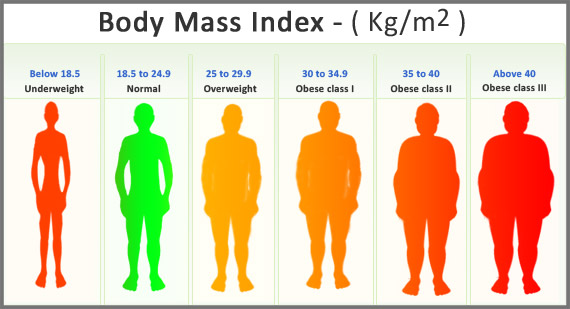

In [10]:
# Checking for outliers in the weight feature.

thinner = len(df2[df2['weight'] < 40])
print(f'There are {thinner} patients with weight under 40kg.')

There are 50 patients with weight under 40kg.


In [11]:
# Excluding patients with less than 40kg.

df2 = df2[df2['weight'] > 40]

**Blood pressure:** There are blood pressures with negative values, is that possible?

- After some research I saw that it is possible to a blood pressure be negative, but in order to the low impact on the dataset, we decided to exclude them.



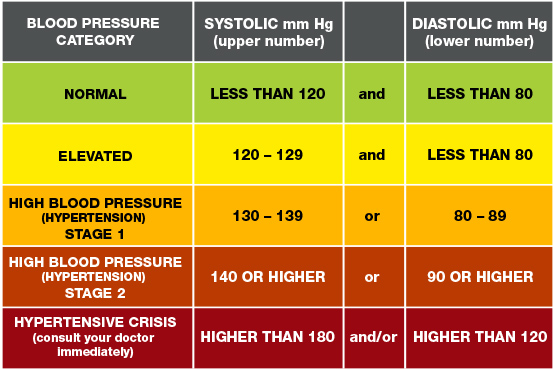



In [12]:
negative_ap_hi = len(df2[df2['ap_hi'] < 0])
negative_ap_lo = len(df2[df2['ap_lo'] < 0])

print(f'There are {negative_ap_hi} cases of negative ap_hi and {negative_ap_lo} cases of negative ap_lo')

There are 7 cases of negative ap_hi and 1 cases of negative ap_lo


In [13]:
# The negative blood pressure cases and to low or to high will be excluded.

df2 = (df2[df2['ap_hi'] > 50])
df2 = (df2[df2['ap_hi'] < 220])
df2 = (df2[df2['ap_lo'] > 50])
df2 = (df2[df2['ap_lo'] < 180])

In [14]:
print(f'After the data cleaning ware excluded from the original dataset {df1.shape[0] - df2.shape[0]} rows.')

After the data cleaning ware excluded from the original dataset 1512 rows.


In [15]:
df2.shape

(68488, 12)

In [16]:
df2.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,68488.0,19465.696443,2467.112346,10798.0,17660.75,19701.0,21323.25,23713.0
gender,68488.0,1.349083,0.476684,1.0,1.00,1.0,2.00,2.0
height,68488.0,164.458518,7.833527,130.0,159.00,165.0,170.00,207.0
weight,68488.0,74.163148,14.231677,41.0,65.00,72.0,82.00,200.0
ap_hi,68488.0,126.613743,16.606703,70.0,120.00,120.0,140.00,215.0
ap_lo,68488.0,81.403560,9.524719,52.0,80.00,80.0,90.00,170.0
cholesterol,68488.0,1.364706,0.679033,1.0,1.00,1.0,2.00,3.0
gluc,68488.0,1.226098,0.572153,1.0,1.00,1.0,1.00,3.0
smoke,68488.0,0.088074,0.283404,0.0,0.00,0.0,0.00,1.0
alco,68488.0,0.053644,0.225316,0.0,0.00,0.0,0.00,1.0


# Feature Enginnering

In [17]:
df3 = df2.copy()

In [18]:
# Transforming age from days to years
df3['age'] = df3['age'].apply(lambda x: int(x/365))

# Creating BMI Feature
df3['bmi'] = (df3['weight']/((df3['height']/100)**2)).round(2)

# Categorizing BMI
df3['cat_weight'] = df3['bmi'].apply(cat_bmi)

# Categorizing Blood Pressure
df3['cat_blood_pressure'] = df3.apply(lambda x: 0 if x['ap_hi'] < 120 and x['ap_lo'] < 80 else
                                      1 if 120 <= x['ap_hi'] < 130 and x['ap_lo'] < 80 else
                                      2 if 130 <= x['ap_hi'] < 140 or 80 <= x['ap_lo'] < 90 else
                                      3 if 140 <= x['ap_hi'] <= 180 or 90 <= x['ap_lo'] <= 120
                                      else 4, axis  =1)

In [19]:
df3.reset_index('id', inplace = True, drop = True)
df3.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,cat_weight,cat_blood_pressure
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,1,2
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93,3,3
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51,1,2
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71,2,3
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01,1,0


# EDA - Exploratory Data Analysis

In [20]:
df3.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,cat_weight,cat_blood_pressure
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,1,2
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93,3,3
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51,1,2
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71,2,3
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01,1,0


In [21]:
df4 = df3.copy()

## Univariate Ananalysis

### Age

<AxesSubplot:>

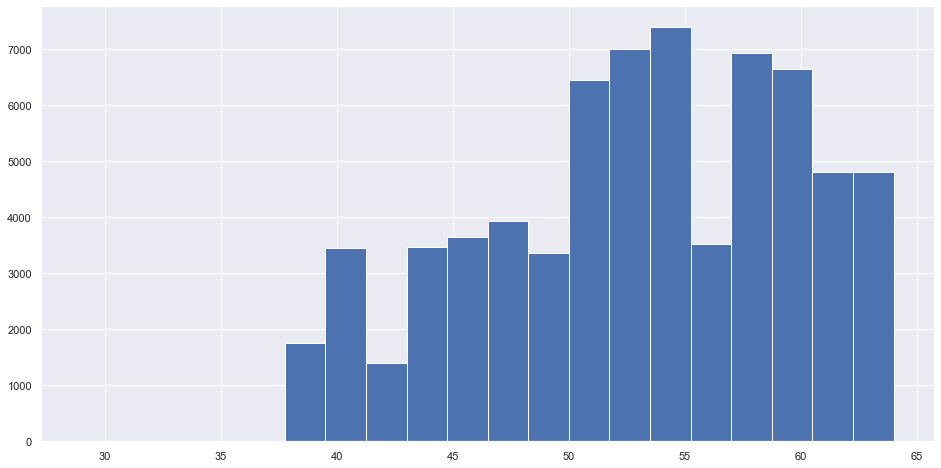

In [43]:
df4['age'].hist(bins = 20)

C:\Users\felip\Anaconda3\envs\cardio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


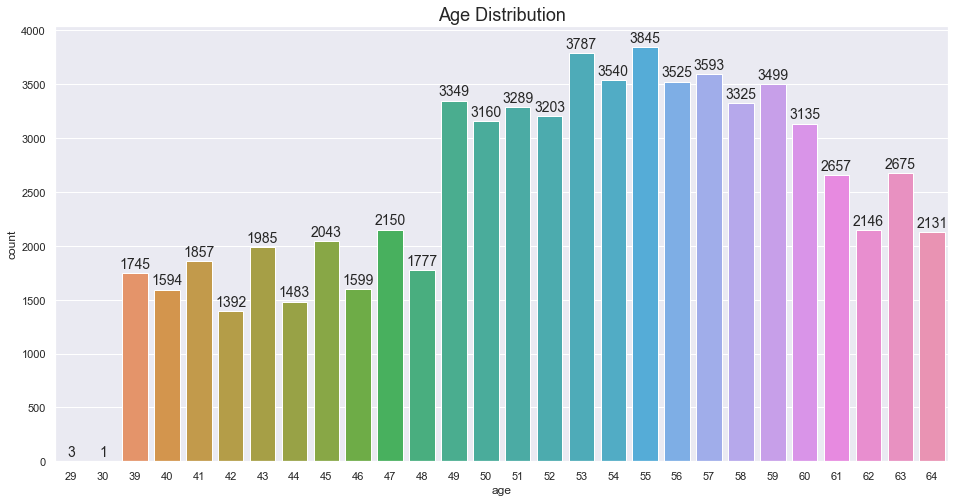

In [119]:
age_plot = sns.countplot(df4['age'])

annot_plot(age_plot)

plt.title('Age Distribution', fontsize = 18);

### Cardio Disease

In [22]:
# Disease proportion on dataset

print(f'Patients without cardio disease: {df4.cardio.value_counts()[0]} - {round((df4.cardio.value_counts()[0] / len(df4)) * 100, 2)}%'
      f'\nPatients with cardio disease: {df4.cardio.value_counts()[1]} -  {round((df4.cardio.value_counts()[1] / len(df4)) * 100, 2)}%')

Patients without cardio disease: 34576 - 50.48%
Patients with cardio disease: 33912 -  49.52%


C:\Users\felip\Anaconda3\envs\cardio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


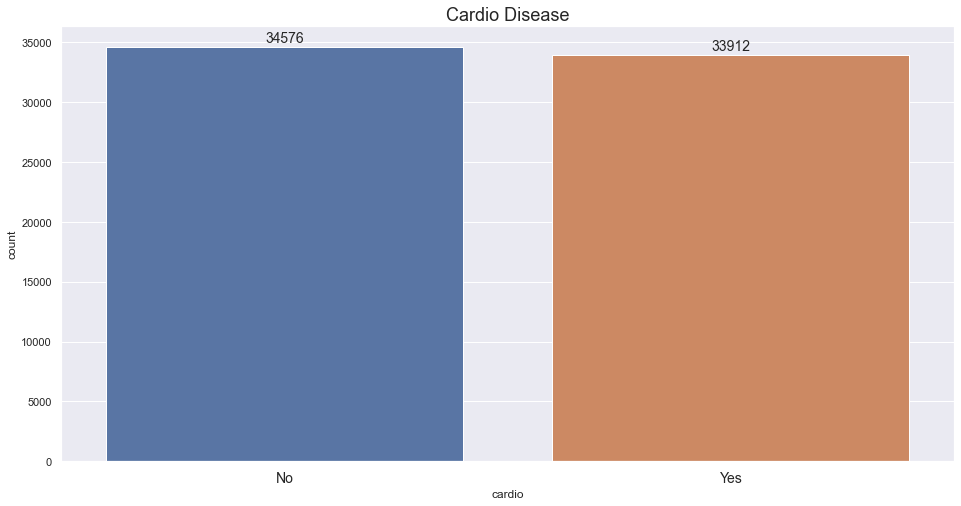

In [118]:
disease_plot = sns.countplot(df4['cardio'])

annot_plot(disease_plot)

plt.xticks([0, 1], ['No', 'Yes'], fontsize = 14, rotation = 'horizontal')
plt.title('Cardio Disease', fontsize = 18);

C:\Users\felip\Anaconda3\envs\cardio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


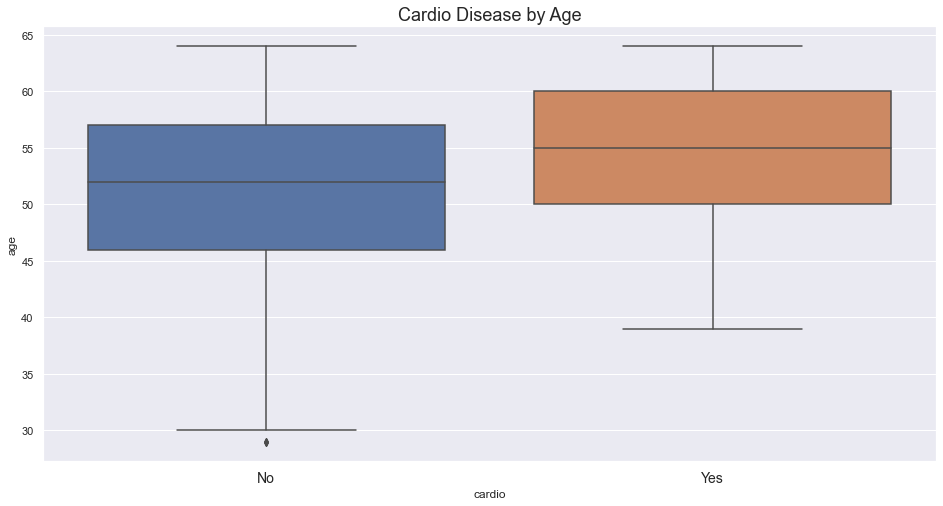

In [124]:
# Boxplot - Cardio Disease by Age.

ax = sns.boxplot('cardio', 'age', data = df4)
ax.set_title('Cardio Disease by Age', fontsize = 18)
plt.xticks([0, 1], ['No', 'Yes'], fontsize = 14)
ax;

C:\Users\felip\Anaconda3\envs\cardio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cardio Disese by Smoker')

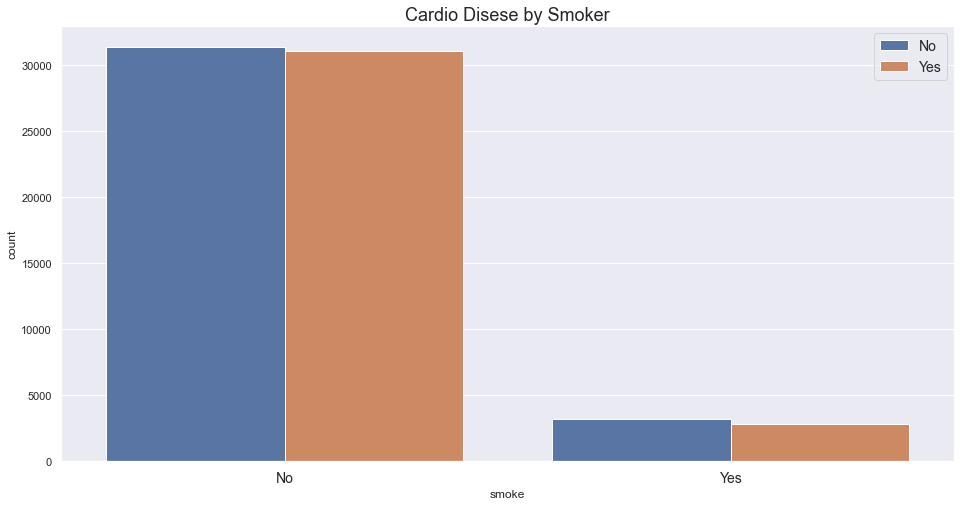

In [142]:
sns.countplot('smoke', hue = 'cardio', data = df4)

plt.xticks([0, 1], ['No', 'Yes'], fontsize = 14, rotation = 'horizontal')
plt.legend(labels = ['No', 'Yes'], fontsize = 14)
plt.title('Cardio Disese by Smoker', fontsize = 18)

C:\Users\felip\Anaconda3\envs\cardio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


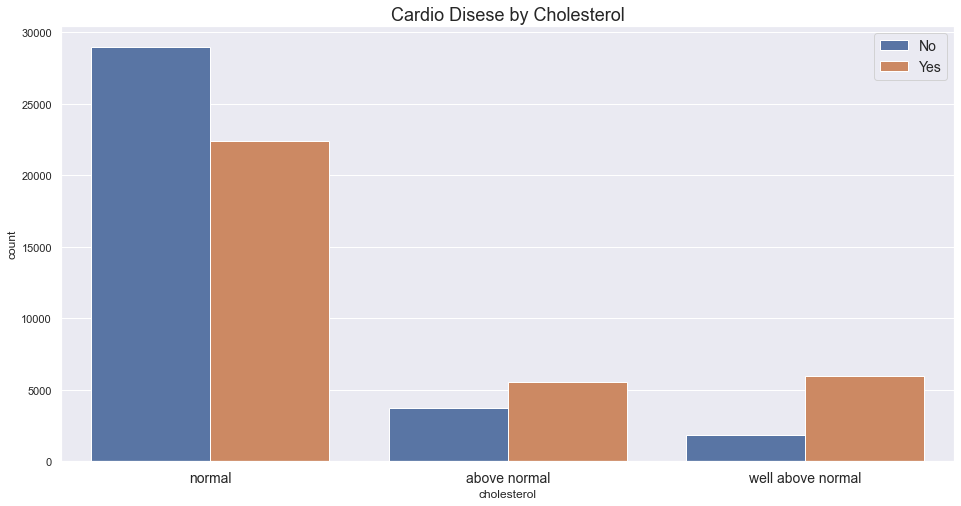

In [144]:
sns.countplot('cholesterol', hue = 'cardio', data = df4)

plt.xticks([0, 1, 2], ['normal', 'above normal', 'well above normal'], fontsize = 14, rotation = 'horizontal')
plt.legend(labels = ['No', 'Yes'], fontsize = 14)
plt.title('Cardio Disese by Cholesterol', fontsize = 18);

C:\Users\felip\Anaconda3\envs\cardio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='bmi'>

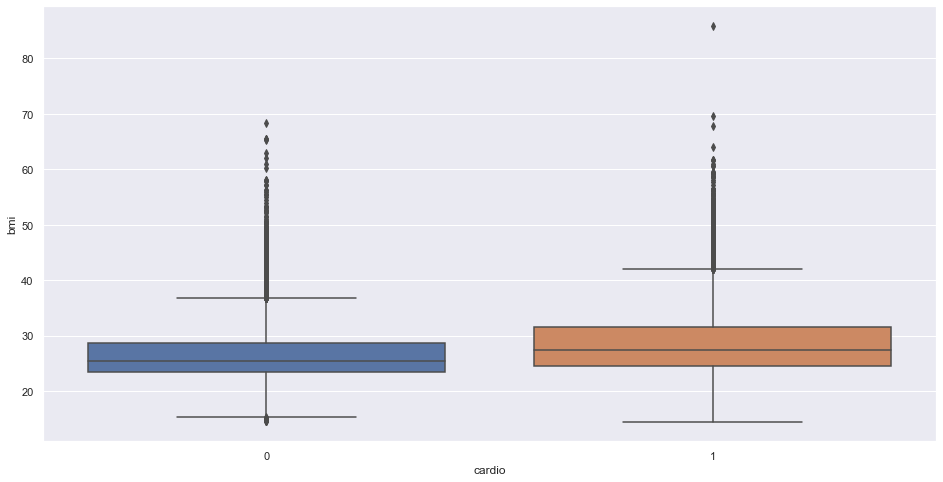

In [146]:
sns.boxplot('cardio', 'bmi', data = df4)

In [145]:
df4.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,cat_weight,cat_blood_pressure
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,1,2
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93,3,3
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51,1,2
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71,2,3
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01,1,0


### Gender

In [65]:
df4['gender'].value_counts()

1    44580
2    23908
Name: gender, dtype: int64

C:\Users\felip\Anaconda3\envs\cardio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


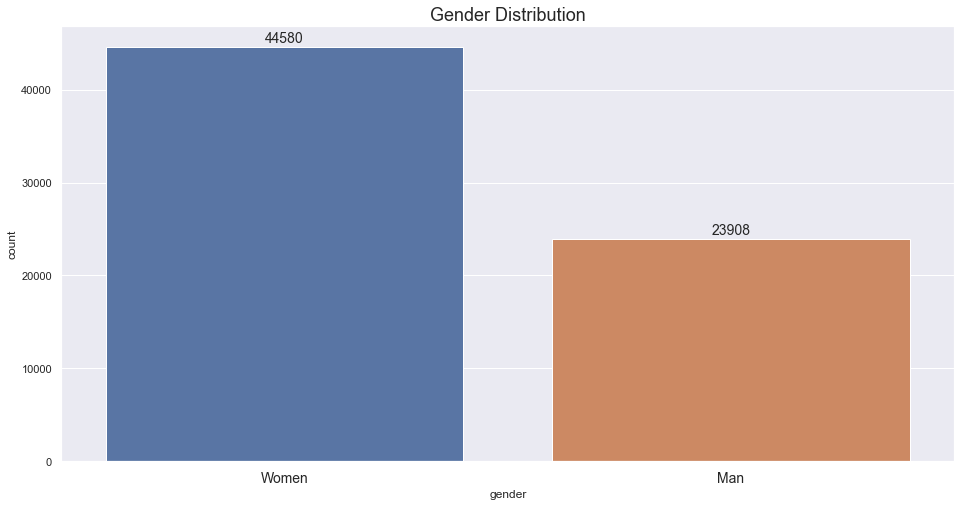

In [117]:
gender_plot = sns.countplot(df4['gender'])

annot_plot(gender_plot)

plt.title('Gender Distribution', fontsize = 18)
plt.xticks([0, 1], ['Women', 'Man'], rotation = 'horizontal', fontsize = 14);

C:\Users\felip\Anaconda3\envs\cardio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


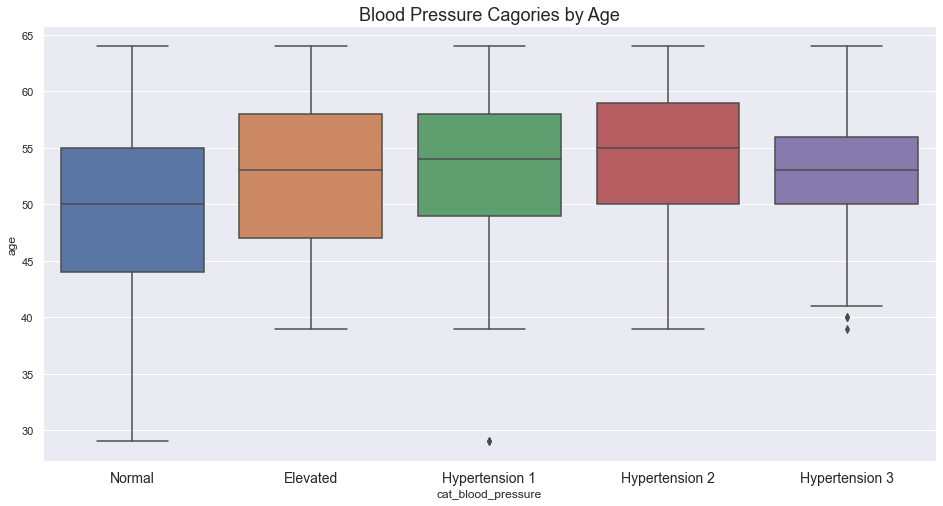

In [132]:
# BoxPlot - Blod Pressure by Age

sns.boxplot('cat_blood_pressure', 'age',data = df4)

plt.title('Blood Pressure Cagories by Age', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4], ['Normal', 'Elevated', 'Hypertension 1', 'Hypertension 2', 'Hypertension 3'], fontsize = 14);

C:\Users\felip\Anaconda3\envs\cardio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


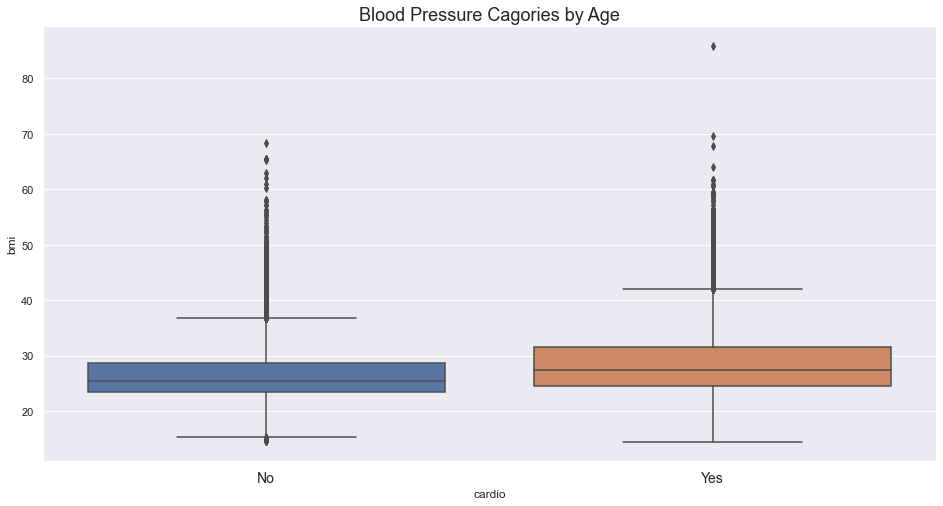

In [133]:
# Violin Plot - Cardio Disease by BMI

sns.boxplot('cardio', 'bmi',data = df4)

plt.title('Blood Pressure Cagories by Age', fontsize = 18)
plt.xticks([0, 1], ['No', 'Yes'], fontsize = 14);

### Bloob Pressure Cat.

C:\Users\felip\Anaconda3\envs\cardio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


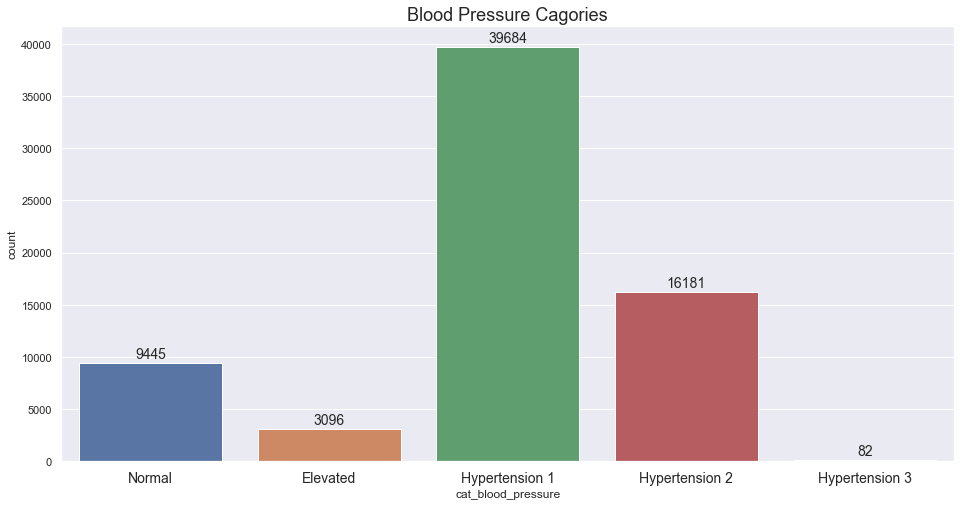

In [123]:
blod_p = sns.countplot(df4['cat_blood_pressure'])

annot_plot(blod_p)

plt.title('Blood Pressure Cagories', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4], ['Normal', 'Elevated', 'Hypertension 1', 'Hypertension 2', 'Hypertension 3'], fontsize = 14);

## Bivariate Analysis

## Multivariate Analysis

In [115]:
df4.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,cat_weight,cat_blood_pressure
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,1,2
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93,3,3
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51,1,2
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71,2,3
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01,1,0


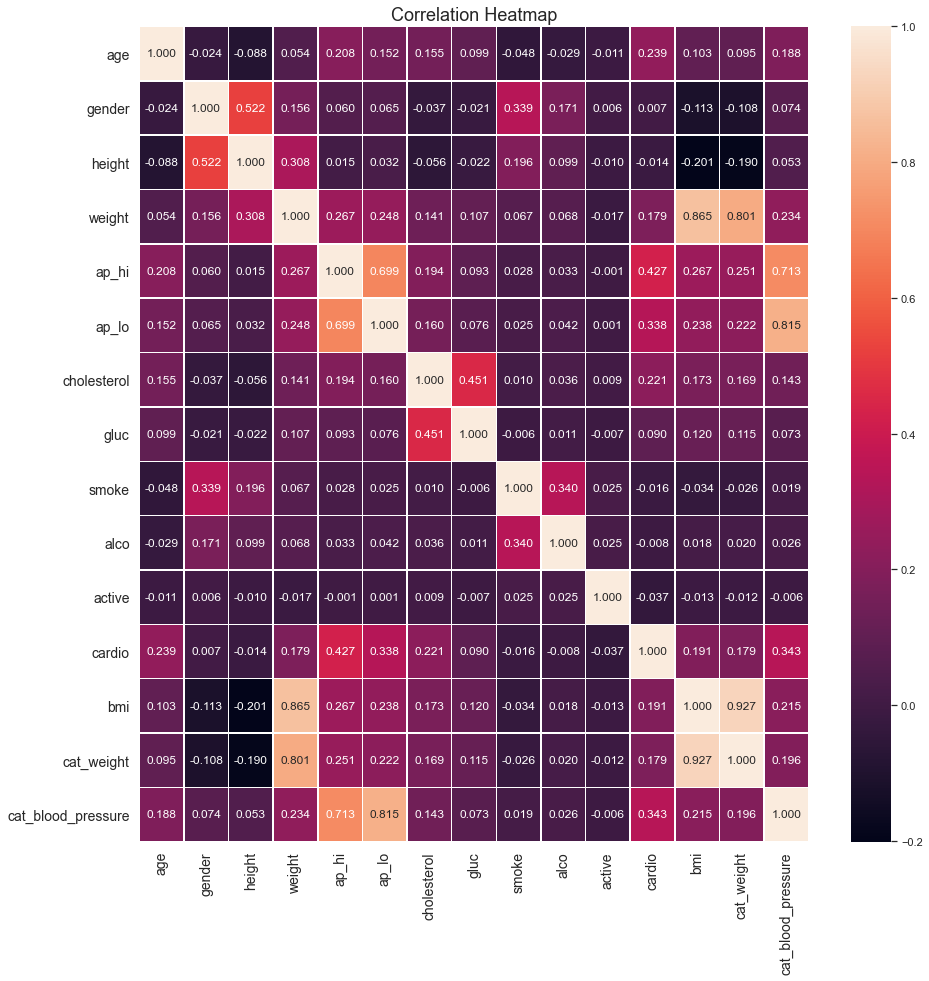

In [153]:
corr = df4.corr()

f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)
plt.title('Correlation Heatmap', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(rotation = 'horizontal', fontsize = 14);

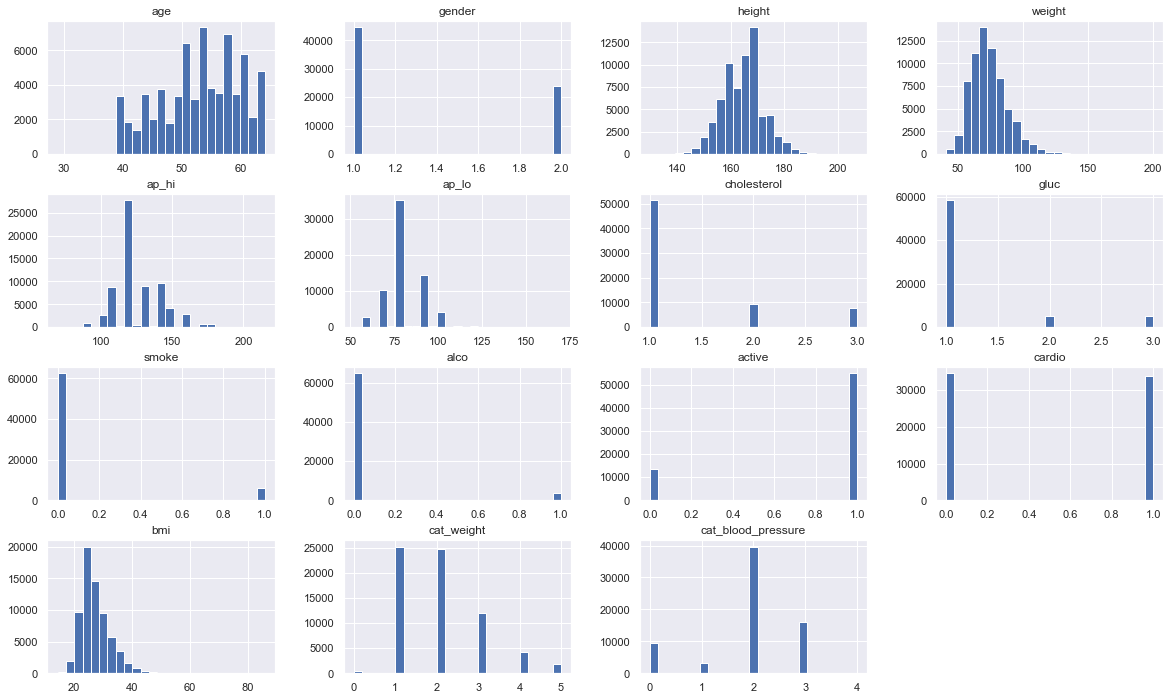

In [155]:
df4.hist(figsize = (20,12), bins = 25);

# Features Selection

In [160]:
df5 = df4.copy()
df5 = df5[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
           'alco', 'active', 'bmi', 'cat_weight', 'cat_blood_pressure', 'cardio']]

df5.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,cat_weight,cat_blood_pressure,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,21.97,1,2,0
1,55,1,156,85.0,140,90,3,1,0,0,1,34.93,3,3,1
2,51,1,165,64.0,130,70,3,1,0,0,0,23.51,1,2,1
3,48,2,169,82.0,150,100,1,1,0,0,1,28.71,2,3,1
4,47,1,156,56.0,100,60,1,1,0,0,0,23.01,1,0,0


In [163]:
x = df5[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
           'alco', 'active', 'bmi', 'cat_weight', 'cat_blood_pressure']]
y = [-1]

In [164]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,cat_weight,cat_blood_pressure,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,21.97,1,2,0
1,55,1,156,85.0,140,90,3,1,0,0,1,34.93,3,3,1
2,51,1,165,64.0,130,70,3,1,0,0,0,23.51,1,2,1
3,48,2,169,82.0,150,100,1,1,0,0,1,28.71,2,3,1
4,47,1,156,56.0,100,60,1,1,0,0,0,23.01,1,0,0


# Machine Learning Modeling

# Error Interpretation

# Deploy Model

# Work Diary

* 10/03/21 - Started Cardiovascular_disease_prediction project
    - Done some data description analysis.
    - Started Feature Enginnering.
    
    
* 11/03/21 - Done some more fearture enginnering.
    - Finished first sicle of feature enginnering.
    - started EDA
    
    
* 13/03/21 - EDA.
    - Done some graph analysis.